In [1]:
!pip3 install torch
!pip3 install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [3]:
from datasets import get_dataset_config_names

xtreme_subsets = get_dataset_config_names("xtreme")
print(f"XTREME 서브셋 개수: {len(xtreme_subsets)}")

XTREME 서브셋 개수: 183


In [4]:
panx_subsets = [s for s in xtreme_subsets if s.startswith("PAN")]
panx_subsets[:3]

['PAN-X.af', 'PAN-X.ar', 'PAN-X.bg']

ISO 639-1 언어 코드로 보이는 두 문자로 된 접미사가 존재 
<br>
ex] 독일어(de), 프랑스어(fr), 이탈리아어(it), 영어(en)

In [5]:
from collections import defaultdict
from datasets import DatasetDict

from datasets import load_dataset

langs = ["de", "fr", "it", "en"]
# 스위스에서 사용하는 언어로 독일어(62.9%), 프랑스어(22.9%), 이탈리아어(8.4%), 영어(5.9%)
fracs = [0.629, 0.229, 0.084, 0.059]

# 키가 없는 경우 DatasetDict를 반환
panx_ch = defaultdict(DatasetDict)

for lang, frac in zip(langs, fracs):
  # 다국어 말뭉치를 로드
  ds = load_dataset("xtreme", name=f"PAN-X.{lang}")
  # 각 분할을 언어 비율에 따라 다운 샘플링하고 섞기
  # ds는 train, validaton, test 3가지로 나옴 
  for split in ds:
    # 데이터셋에 의도하지 않은 편향이 들어가지 않도록 shuffle 함수를 사용
    # select() 메서드는 fracs 값을 따라 각 말뭉치를 다운샘플링
    panx_ch[lang][split] = (ds[split].shuffle(seed=0).select(range(int(frac * ds[split].num_rows))))  
    

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.de/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.fr/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.it/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/PAN-X.en/1.0.0/29f5d57a48779f37ccb75cb8708d1095448aad0713b425bdc1ff9a4a128a56e4. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
import pandas as pd

pd.DataFrame({lang: [panx_ch[lang]["train"].num_rows] for lang in langs}, index=["Number of training examples"])

,de,fr,it,en
Number of training examples,12580,4580,1680,1180


In [7]:
element = panx_ch["de"]["train"][0]
for key, value in element.items():
  print(f"{key}: {value}")

tokens: ['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags: [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs: ['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']


ner_tags 열은 각 개체명이 매핑된 클래스 ID에 해당

In [8]:
for key, value in panx_ch["de"]["train"].features.items():
  print(f"{key}: {value}")

tokens: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
ner_tags: Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None), length=-1, id=None)
langs: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


In [9]:
tags = panx_ch["de"]["train"].features["ner_tags"].feature
print(tags)

ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)


각 태그의 클래스 이름을 담은 새로운 역(ner_tags_str)을 훈련 세트에 추가

In [10]:
def create_tag_names(batch):
  return {"ner_tags_str": [tags.int2str(idx) for idx in batch["ner_tags"]]}

panx_de = panx_ch["de"].map(create_tag_names)

  0%|          | 0/12580 [00:00<?, ?ex/s]

  0%|          | 0/6290 [00:00<?, ?ex/s]

  0%|          | 0/6290 [00:00<?, ?ex/s]

In [11]:
de_example = panx_de["train"][0]
pd.DataFrame([de_example["tokens"], de_example["ner_tags_str"]], ['Tokens', 'Tags'])

,0,1,2,3,4,5,6,7,8,9,10,11
Tokens,2.000,Einwohnern,an,der,Danziger,Bucht,in,der,polnischen,Woiwodschaft,Pommern,.
Tags,O,O,O,O,B-LOC,I-LOC,O,O,B-LOC,B-LOC,I-LOC,O


태그가 불균형하게 부여되지 않았나 확인 위해 각 분할에서 개체명의 빈도를 계산

In [12]:
from collections import Counter

split2freqs = defaultdict(Counter)
for split, dataset in panx_de.items():
  for row in dataset["ner_tags_str"]:
    for tag in row:
      if tag.startswith("B"):
        tag_type = tag.split("-")[1]
        split2freqs[split][tag_type] += 1

pd.DataFrame.from_dict(split2freqs, orient="index")

,LOC,ORG,PER
train,6186,5366,5810
validation,3172,2683,2893
test,3180,2573,3071


결과를 보니 균형 있게 부여. 
<br><br>
PER, LOC, ORG 빈도 분포가 대체로 각 분할에서 동일. 따라서 검증 세트와 테스트 세트는 NER 태그의 일반화 능력을 평가하는데 적절

# 다중 언어 트랜스포머
다중 언어 트랜스포머의 훈련 과정과 아키텍처는 단일 언어 트랜스포머와 비슷, 다만 사전 훈련에 사용하는 말뭉치가 여러 언어의 문서로 구성될 뿐
<br><br>
다중 언어 트랜스포머 모델은 일반적으로 3가지 방식으로 평가
<br>
## 1. en
- 영어 훈련 데이터에서 미세 튜닝한 다음 각 언어의 테스트 세트에서 평가

## 2. each
- 언어별 성능을 측정하기 위해 단일 언어의 테스트 세트에서 미세 튜닝하고 평가

## 3. all
- 모든 훈련 데이터에서 미세 튜닝해 각 언어의 테스트 세트에서 평가



# XLM-R 토큰화
XLM-R은 WordPiece 토크나이저 대신 100개 언어의 텍스트에서 훈련된 SentencePiece라는 토크나이저를 사용

In [13]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 102.1 MB/s eta 0:00:00


In [14]:
from transformers import AutoTokenizer

bert_model_name = "bert-base-cased"
xlmr_model_name = "xlm-roberta-base"
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

In [15]:
text = "Jack Sparrow loves Net York!"
bert_tokens = bert_tokenizer(text).tokens()
xlmr_tokens = xlmr_tokenizer(text).tokens()



In [16]:
print(bert_tokens)
print(xlmr_tokens)

['[CLS]', 'Jack', 'Spa', '##rrow', 'loves', 'Net', 'York', '!', '[SEP]']
['<s>', '▁Jack', '▁Spar', 'row', '▁love', 's', '▁Net', '▁York', '!', '</s>']


## 토큰화 파이프라인
토큰화를 다룰 때 문자열을 모델에 주입할 정수로 변환하는 연산으로만 여겼지만 이는 전적으로 옳은 것은 아님. 실제 처리 파이프 라인은 아래와 같이 4 단계로 구성됨

1. 정규화
2. 사전 토큰화
3. 토크나이저 모델
4. 사후처리

1. 정규화
- 원시 문자열을 깨끗하게 만들기 위해 적용하는 일련의 연산, 대게 이런 연산에는 공백과 악센트가 붙는 문자를 제거하는 작업 등이 포함
- 유니코드 정규화(https://unicode.org/reports/tr15/)는 많은 토크나이저에서 적용하는 또 다른 일반적 정규화 연산

2. 사전 토큰화(pretokenization)
- 텍스트를 더 작은 객체로 분할하며 훈련 마지막에 생성되는 토큰의 상한선을 제공
- 사전 토큰화가 텍스트를 단어로 분할하고 최종 토큰은 이 단어의 일부가 된다 생각하면 됨
- 영어, 독어 등 많은 유럽어족의 언어에서 문자열이 일반적으로 공백과 구두점을 기준 삼아 단어로 분할
  - 이런 단어는 파이프라인의 다음 단계에서 BPE, 유니그램 알고리즘을 사용해 부분단어(subword)로 분할하기 더 쉬움

3. 토크나이저 모델
- 부분단어 분할 모델을 단어에 적용, 이 모델은 단어를 부분단어로 나눠 어휘사전의 크기와 OOV 토큰의 개수를 줄이는 역할을 함
- 부분단어 알고리즘
  - BPE,
  - 유니그램
  - WordPiece

4. 사후처리
- 토큰 리스트에 부가적인 변환을 적용
  - Ex] 입력 토큰 인덱스의 시퀀스 처음과 끝에 특수 토큰을 추가하는 경우 등

# SentencePiece 토크나이저
유니그램이라는 부분단어 분할 방식을 기반으로 각 입력 텍스트를 유니코드 문자 시퀀스로 인코딩
- 일본어 등의 많은 언어에 공백문자가 있지 않는데 SentencePiece의 또 다른 고유한 특징은 공백문자가 유니코드 기호 U+2581 또는 '_' 문자에 할당 되므로 언어별 사전 토크나이저에 의존하지 않고 정확하게 시퀀스 복원이 가능 

# 개체명 인식을 위한 트랜스포머
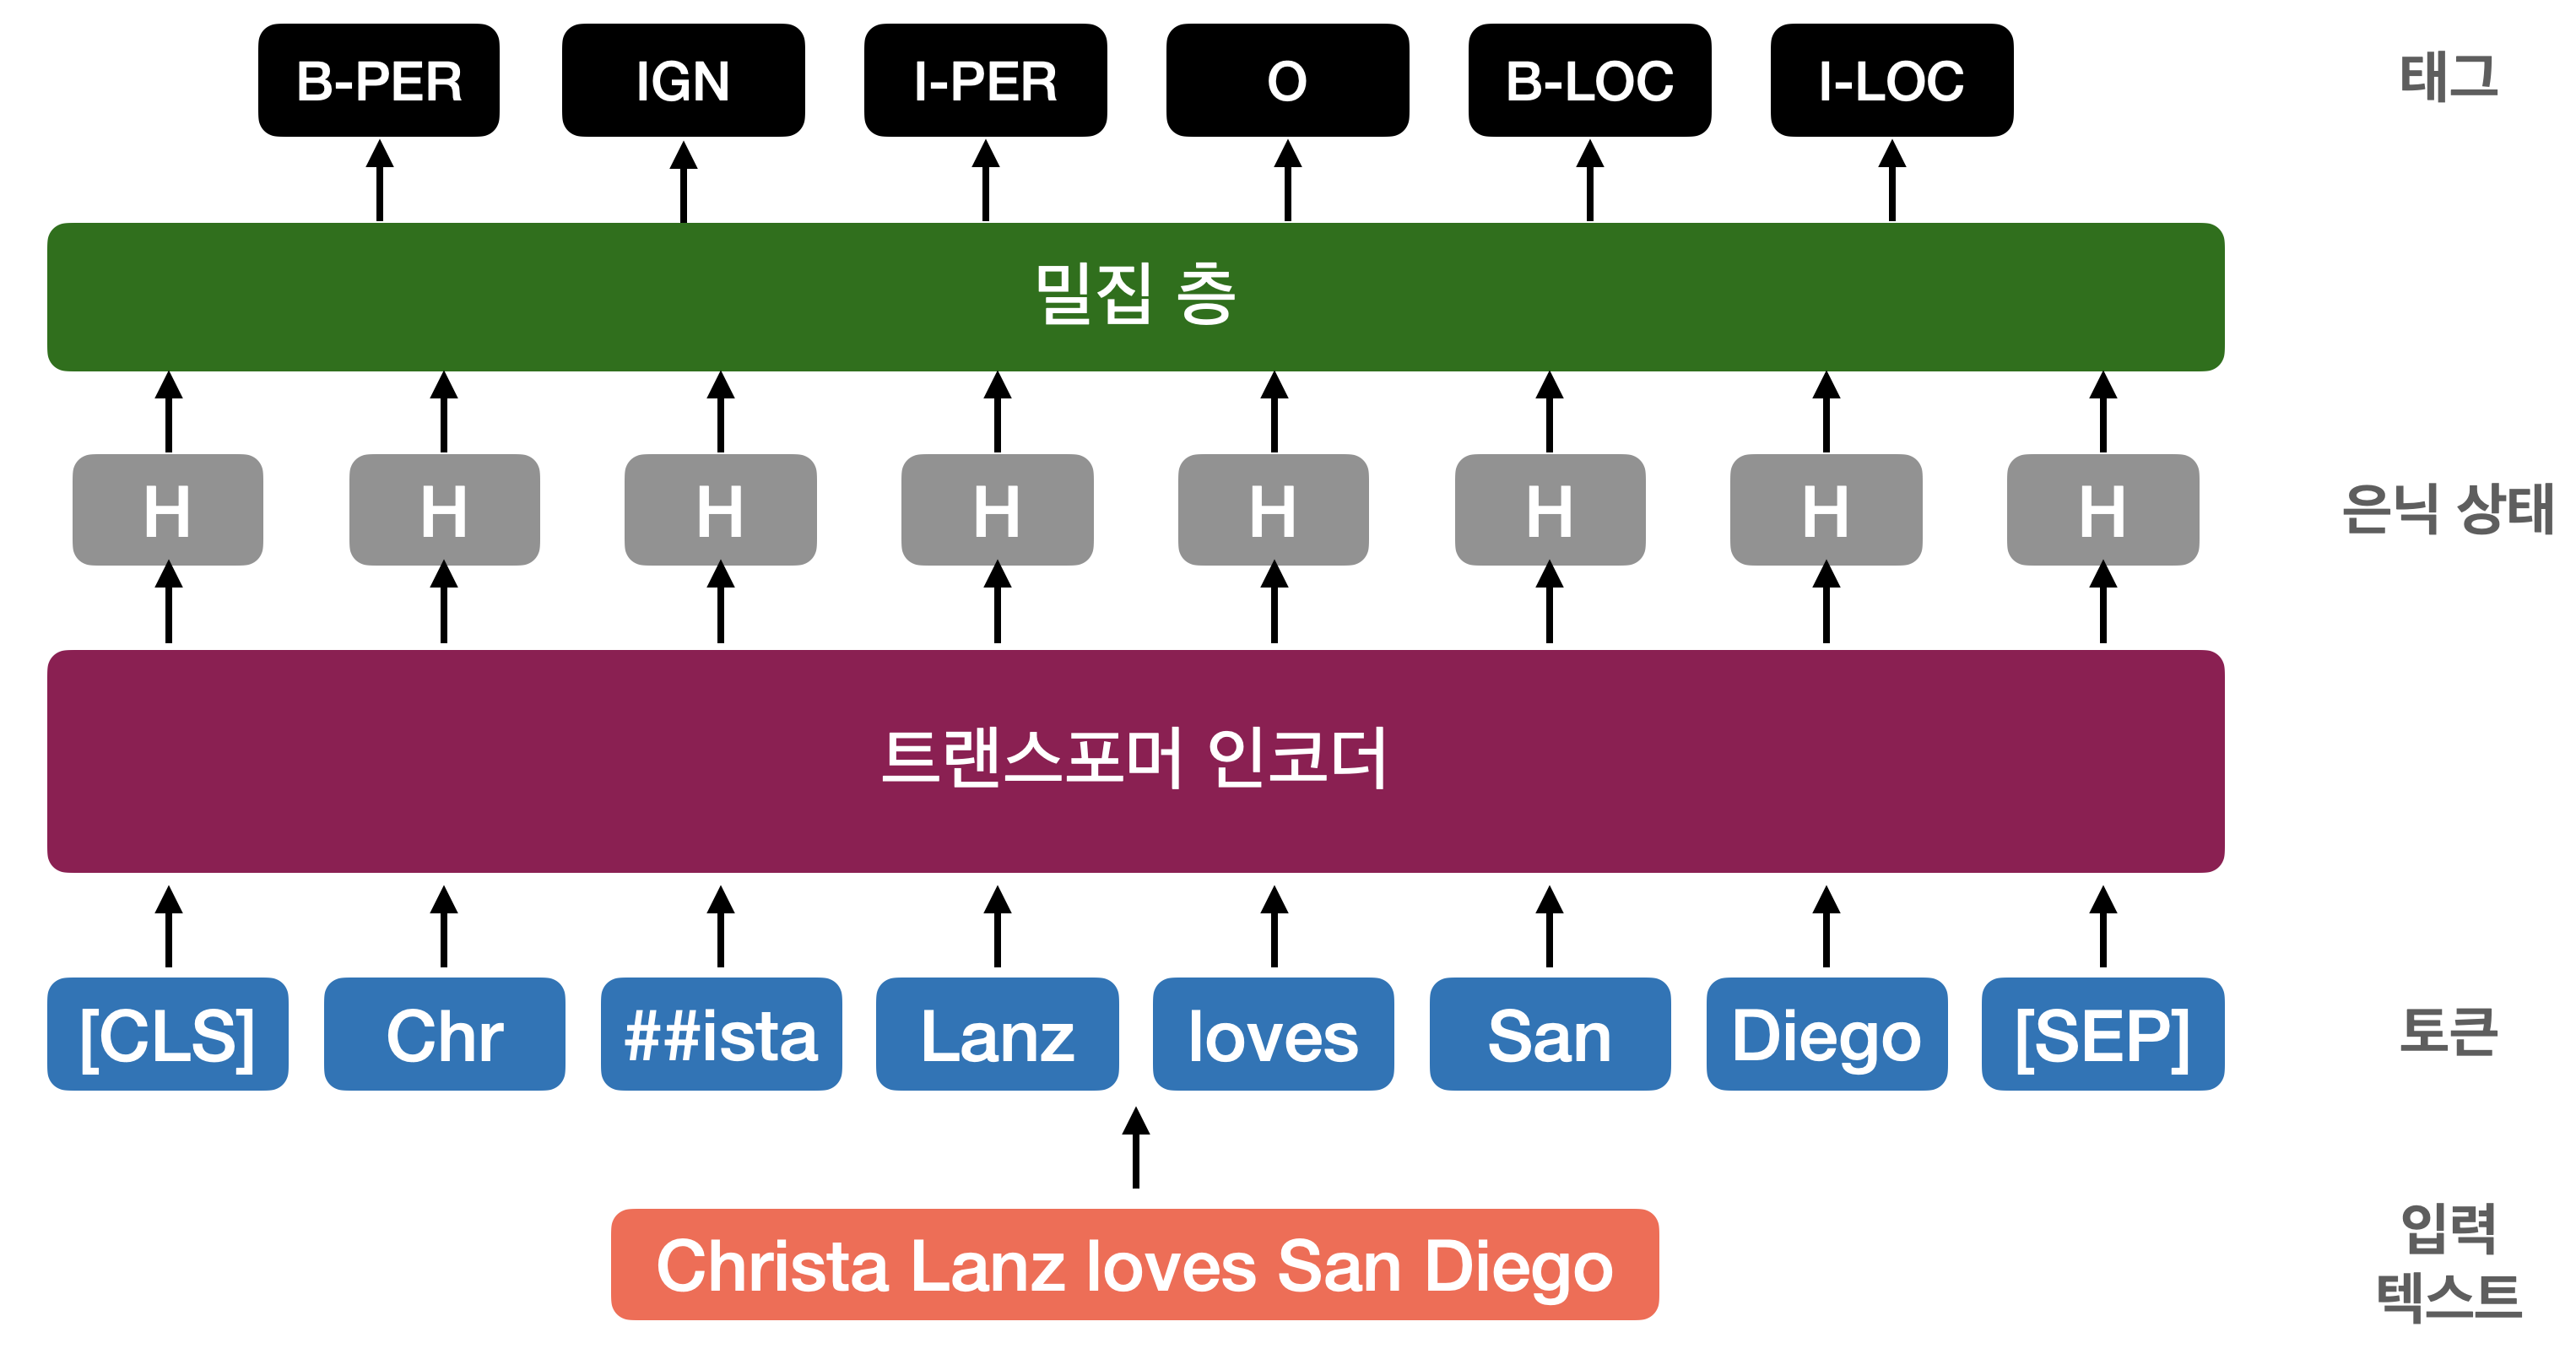



토큰 분류 작업에서 부분단어 처리 방법
<br>
예를 들어 이름 Christa는 Chr와 #ista로 토큰화 됨 이중 어느 단어에 (아니면 두 단어 모두에) B-PER 레이블을 할당해야 할까요?
<br>
BERT 논문에서 저자들은 첫번째 부분단어('Chr')에 할당하고 이어지는 부분단어는 무시, 무시한 부분단어를 IGN으로 표시. 나중에 후처리 단계에서 첫 번째 부분단어의 예측 레이블을 후속 부분단어로 쉽게 전파 가능

# 트랜스포머 모델 클래스
트랜스포머스는 아키텍처와 작업마다 전용 클래스를 제공
<br>
작업에 연관된 모델 클래스 이름은 <ModelName>For<Task> 형식을 따름. AutoModel 클래스를 사용하는 경우 AutoModelFor<Task>
<br><br>
트랜스포머스는 기존 모델을 특정 작업에 맞춰 쉽게 확장 가능하도록 설계됨. 사전 훈련된 모델에서 가중치를 로드하고 작업에 특화된 헬퍼 함수를 사용. 특정 용도의 사용자 정의 모델을 만들 수 있음

## 바디와 헤드
트랜스포머스의 모델들은 바디(body)와 헤드(head)로 나뉜 모델 구조를 가짐
<br>
모델의 마지막 층이 후속 작업에 맞는 층으로 변환. 이 마지막 층이 모델의 **헤드** 이며 작업에 특화
<br>
헤드를 제외한 모델의 나머지 부분을 **바디**라 함. 작업에 특화되지 않은 토큰 임베딩과 트랜스포머 층이 포함. 모델의 바디는 BertModel 또는 GPT2Model 같은 클래스로 구현되며 마지막 바디의 마지막 층의 은닉 상태를 반환
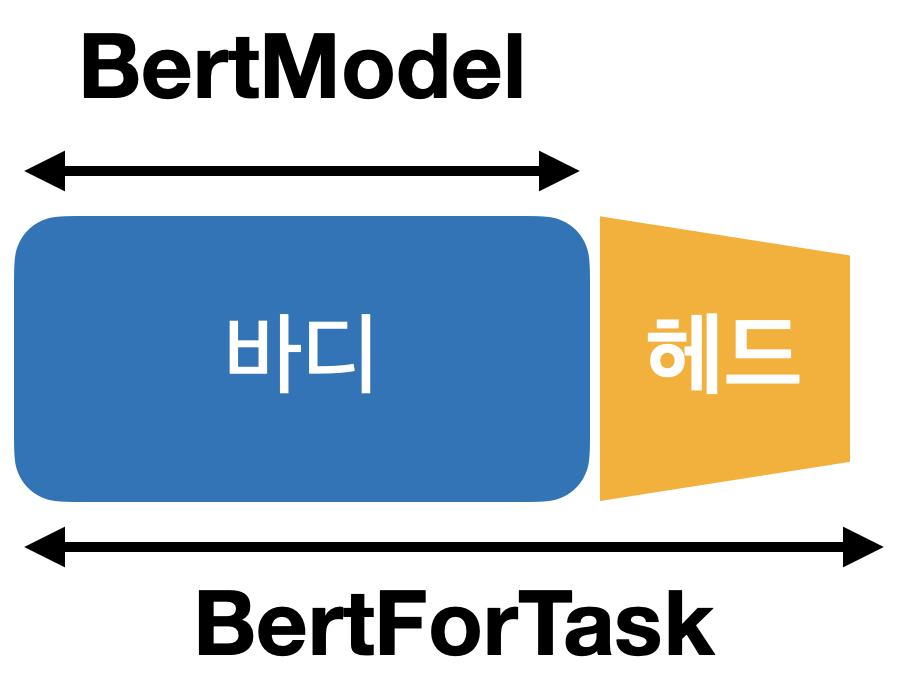

## 토큰 분류를 위한 사용자 정의 모델 만들기

In [17]:
import torch.nn as nn
from transformers import XLMRobertaConfig
from transformers.modeling_outputs import TokenClassifierOutput
from transformers.models.roberta.modeling_roberta import RobertaModel
from transformers.models.roberta.modeling_roberta import RobertaPreTrainedModel

class XLMRobertaForTokenClassification(RobertaPreTrainedModel):
  config_class = XLMRobertaConfig

  def __init__(self, config):
    super().__init__(config)
    self.num_labels = config.num_labels
    # 모델 바디를 로드
    self.roberta = RobertaModel(config, add_pooling_layer=False)
    # 토큰 분류 헤드를 준비
    self.dropout = nn.Dropout(config.hidden_dropout_prob)
    self.classifier = nn.Linear(config.hidden_size, config.num_labels)
    # 가중치를 로드하고 초기화
    self.init_weights()

  def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None, **kwargs):
    # 모델 바디를 사용해 인코더 표현을 얻음
    outputs = self.roberta(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, **kwargs)
    # 인코더 표현을 헤드에 통과
    sequence_output = self.dropout(outputs[0])
    logits = self.classifier(sequence_output)
    # 손실을 계산
    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
    # 모델 출력 객체를 반환
    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states, attentions=outputs.attentions)

- config 클래스는 새로운 모델을 초기화할 때 표준 XLM-R 설정을 사용하도록 도와줌
- super() 메서드로 RobertaPreTrainedModel 클래스의 초기화 함수를 호출
  - 사전 훈련된 가중치의 초기화나 로딩을 처리
- add_pooling_layer=False로 지정하여 [CLS] 토큰에 해당하는 은닉 상태 외에 모든 은닉 상태가 반환되도록 함
  - add_pooling_layer의 기본값은 True로 첫 번째 토큰의 은닉 상태만 밀집 층과 활성화 함수에 통과시켜 출력
- RobertaPreTrainedModel 클래스에서 상속된 init_weights() 메서드를 호출해 가중치를 초기화
  - 모델 바디에 사전훈련된 가중치가 로드되고 토큰 분류 헤드의 가중치가 랜덤하게 초기화 될 것

In [18]:
# [tags를 정의했던 위 코드]
# tags = panx_ch["de"]["train"].features["ner_tags"].feature
# ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)

index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}

In [19]:
from transformers import AutoConfig

xlmr_config = AutoConfig.from_pretrained(xlmr_model_name, num_labels=tags.num_classes, id2label=index2tag, label2id=tag2index)

AutoConfig 클래스는 모델 구조의 청사진을 가짐. AutoModel.from_pretrained(model_ckpt)로 모델을 로드할 때 모델에 연관된 설정 파일이 자동으로 다운로드 됨. but, 클래스 개수나 레이블 이름 등을 수정하고자 한다면 커스터마이징 하려는 매개변수로 이 설정 파일을 먼저 로드해야 함

In [20]:
# from_pretrained() 함수를 사용해 모델 가중치를 로드
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
xlmr_model = (XLMRobertaForTokenClassification.from_pretrained(xlmr_model_name, config=xlmr_config).to(device))

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForTokenClassification: ['lm_head.layer_norm.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.weight', 'roberta

from_pretrained() 함수를 사용해 모델 가중치를 로드. 모델 클래스에 사전 훈련된 가중치를 로드하는 코드는 없지만 RobertaPreTrainedModel을 사용했으니 로드 가능

In [21]:
# 토크나이저와 모델을 바르게 초기화했는지 확인
input_ids = xlmr_tokenizer.encode(text, return_tensors="pt")
print(input_ids)
pd.DataFrame([xlmr_tokens, input_ids[0].numpy()], index=["Tokens", "Input IDs"])

tensor([[    0, 21763, 37456, 15555,  5161,     7, 10086,  5753,    38,     2]])


,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁Net,▁York,!,</s>
Input IDs,0,21763,37456,15555,5161,7,10086,5753,38,2


In [22]:
# 모델에 입력 ID를 전달하고 argmax 함수로 토큰마다 확률이 가장 높은 클래스를 선택해 예측
outputs = xlmr_model(input_ids.to(device)).logits
predictions = torch.argmax(outputs, dim=-1)
print(f"시퀀스에 있는 토큰 개수: {len(xlmr_tokens)}")
print(f"출력 크기: {outputs.shape}")

시퀀스에 있는 토큰 개수: 10
출력 크기: torch.Size([1, 10, 7])


로짓의 크기는 [batch_size, num_tokens, num_tags] 이고 이는 각 토큰에는 일곱 개의 NER 태그와 로짓이 주어졌다는 의미.

In [23]:
print(predictions[0])
preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
pd.DataFrame([xlmr_tokens, preds], index=["Tokens", "Tags"])

tensor([5, 1, 1, 1, 5, 1, 3, 3, 1, 5], device='cuda:0')


,0,1,2,3,4,5,6,7,8,9
Tokens,<s>,▁Jack,▁Spar,row,▁love,s,▁Net,▁York,!,</s>
Tags,B-LOC,B-PER,B-PER,B-PER,B-LOC,B-PER,B-ORG,B-ORG,B-PER,B-LOC


랜덤한 가중치를 가진 토큰 분류 층은 역시나 개선할 여지가 많음. 레이블링된 데이터로 미세 튜닝하여 결과를 더 좋게 만들어야 할걸로 보임

In [24]:
def tag_text(text, tags, model, tokenizer):
  # 토큰을 준비
  tokens = tokenizer(text).tokens()
  # 시퀀스를 입력 ID로 인코딩
  input_ids = xlmr_tokenizer(text, return_tensors="pt").input_ids.to(device)
  # 가능한 일곱 개의 클래스에 대한 로짓을 출력
  outputs = model(input_ids)[0]
  # argmax 함수로 토큰마다 가장 가능성이 높은 클래스를 선택
  predictions = torch.argmax(outputs, dim=2)
  # 데이터프레임으로 변환
  preds = [tags.names[p] for p in predictions[0].cpu().numpy()]
  return pd.DataFrame([tokens, preds], index=["Tokens", "Tags"])

# NER 작업을 위해 텍스트 토큰화
샘플을 인코딩하고 처리하는 토크나이저와 모델을 준비했으므로 다음 단계로 미세 튜닝을 위해 XLM-R 모델에 전달할 전체 데이터셋을 토큰화. 데이터셋은 map() 연산으로 Dataset 객체를 빠르게 토큰화

In [25]:
# [de_example 정의했던 코드]
# de_example = panx_de["train"][0]
# pd.DataFrame([de_example["tokens"], de_example["ner_tags_str"]], ['Tokens', 'Tags'])

words, labels = de_example["tokens"], de_example["ner_tags"]

In [26]:
# 각 단어를 토큰화, 토크나이저에 is_split_into_words 매개변수를 사용해 입력 문장이 이미 단어로 나눠졌다는 사실을 전달

tokenized_input = xlmr_tokenizer(de_example["tokens"], is_split_into_words=True)
print(tokenized_input)
tokens = xlmr_tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
pd.DataFrame([tokens], index=["Tokens"])

{'input_ids': [0, 70101, 176581, 19, 142, 122, 2290, 708, 1505, 18363, 18, 23, 122, 127474, 15439, 13787, 14, 15263, 18917, 663, 6947, 19, 6, 5, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>


'Einwohnern'을 두 개의 부분 단어 '_Einwohner'와 'n'으로 나눔. '_Einwohner'만 B-LOC 레이블에 연결해야한다는 규칙을 따라야 하므로 첫 번째 부분단어 이후의 부분단어는 마스킹 <br>
이 작업에 도움이되는 **word_idx()** 함수가 존재

In [27]:
word_ids = tokenized_input.word_ids()
pd.DataFrame([tokens, word_ids], index=["Tokens", "Word IDs"])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None


word_ids는 각 부분단어를 words 리스트에 있는 해당 단어의 인덱스에 매핑. <s>와 </s> 같은 특수 토큰과 부분단어의 레이블을 -100으로 설정해 훈련하는 동안 마스킹 처리

In [28]:
previous_word_idx = None
label_ids = []

for word_idx in word_ids:
  if word_idx is None or word_idx == previous_word_idx:
    label_ids.append(-100)
  elif word_idx != previous_word_idx:
    label_ids.append(labels[word_idx])
  previous_word_idx = word_idx

labels = [index2tag[l] if l != -100 else "IGN" for l in label_ids]
index = ["Tokens", "Word IDs", "Label IDs", "Labels"]

pd.DataFrame([tokens, word_ids, label_ids, labels], index=index)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Tokens,<s>,▁2.000,▁Einwohner,n,▁an,▁der,▁Dan,zi,ger,▁Buch,...,▁Wo,i,wod,schaft,▁Po,mmer,n,▁,.,</s>
Word IDs,None,0,1,1,2,3,4,4,4,5,...,9,9,9,9,10,10,10,11,11,None
Label IDs,-100,0,0,-100,0,0,5,-100,-100,6,...,5,-100,-100,-100,6,-100,-100,0,-100,-100
Labels,IGN,O,O,IGN,O,O,B-LOC,IGN,IGN,I-LOC,...,B-LOC,IGN,IGN,IGN,I-LOC,IGN,IGN,O,IGN,IGN


부분단어 표현을 마스킹하기 위해 ID로 -100을 선택한 이유로는 파이토치에 있는 크로스 엔트로피 손실 클래스의 ignore_index 속성 값이 -100이기 때문, 훈련하는 동안 이 인덱스는 무시되게 됨

In [29]:
def tokenize_and_align_labels(examples):
  tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)
  
  labels = []
  for idx, label in enumerate(examples["ner_tags"]):
    word_ids = tokenized_inputs.word_ids(batch_index=idx)
    previous_word_idx = None
    label_ids = []
    for word_idx in word_ids:
      if word_idx is None or word_idx == previous_word_idx:
        label_ids.append(-100)
      else:
        label_ids.append(label[word_idx])
      previous_word_idx = word_idx
    labels.append(label_ids)
  tokenized_inputs["labels"] = labels
  return tokenized_inputs

In [30]:
def encode_panx_dataset(corpus):
  return corpus.map(tokenize_and_align_labels, batched=True, remove_columns=['langs', 'ner_tags', 'tokens'])

In [31]:
panx_de_encoded = encode_panx_dataset(panx_ch["de"])

  0%|          | 0/13 [00:00<?, ?ba/s]

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/7 [00:00<?, ?ba/s]

# 성능 측정
NER 모델 평가는 텍스트 분류 모델 평가와 비슷. 일반적으로 정밀도, 재현율, F1-점수의 결과를 보고. 유일한 차이는 예측 하나를 정확하다고 판단하기 위해 한 개체명에 있는 모든 단어가 올바르게 예측되어야 한다는 점 <br>
<br>
seqeval 라이브러리를 사용

In [32]:
!pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16179 sha256=c763e2631784352be3bf6f1d8e2dc9e8819e6ff8c1582528886bfa3a8a170802
  Stored in directory: /root/.cache/pip/wheels/ad/5c/ba/05fa33fa5855777b7d686e843ec07452f22a66a138e290e732
Successfully built seqeval


In [33]:
from seqeval.metrics import classification_report

y_true = [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"], ["B-PER", "I-PER", "O"]]
y_pred = [["O", "O", "B-MISC", "I-MISC", "I-MISC", "I-MISC", "O"], ["B-PER", "I-PER", "O"]]

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



seqeval은 리스트의 리스트로 구성된 예측과 레이블을 입력받음. 이런 지표를 훈련 과정에 통합하려면 모델 출력을 seqeval가 기대하는 리스트로 변환하는 함수가 필요. 이를 위해 연속된 부분단어의 레이블 ID는 무시하는 작업이 필요

In [34]:
import numpy as np

def align_predictions(predictions, label_ids):
  preds = np.argmax(predictions, axis=2)
  batch_size, seq_len = preds.shape
  labels_list, preds_list = [], []

  for batch_idx in range(batch_size):
    example_labels, example_preds = [], []
    for seq_idx in range(seq_len):
      # 레이블 IDs = -100 무시
      if label_ids[batch_idx, seq_idx] != -100:
        example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
        example_preds.append(index2tag[preds[batch_idx][seq_idx]])

    labels_list.append(example_labels)
    preds_list.append(example_preds)

  return preds_list, labels_list

# XLM-RoBERTa 미세튜닝
PAN-X의 독일어 서브셋에 베이스 모델을 미세튜닝하고 프랑스어, 이태리어, 영어에서 제로샷 교차 언어 성능을 평가. 트랜스포머스 Trainer를 사용해 훈련 루프 처리

In [35]:
from transformers import TrainingArguments

num_epochs = 3
batch_size = 24
logging_steps = len(panx_de_encoded["train"])
model_name = f"{xlmr_model_name}-finetuned-panx-de"
training_args = TrainingArguments(output_dir=model_name, 
                                  log_level="error",
                                  num_train_epochs=num_epochs,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  evaluation_strategy="epoch",
                                  save_steps=1e6,
                                  weight_decay=0.01,
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False)

검증 세트에서 평가 지표를 어떻게 계산해야 할지 Trainer로 전달해야 함 

In [36]:
from seqeval.metrics import f1_score

def compute_metrics(eval_pred):
  y_pred, y_true = align_predictions(eval_pred.predictions, eval_pred.label_ids)
  return {"f1": f1_score(y_true, y_pred)}

배치에서 가장 큰 시퀀스 길이로 입력 시퀀스를 패딩하도록 데이터 콜레이터(data collator)를 정의. 트랜스포머스는 토큰 분류를 위해 입력과 레이블을 패딩하는 전용 데이터 콜레이터를 제공

In [37]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

레이블도 시퀀스이기에 레이블 패딩도 필수

Trainer를 위해 매번 새로운 모델을 만들지 않도록 model_init() 함수 제작. train() 메서드를 호출시 이 함수가 호출되어 훈련되지 않은 모델을 로드

In [38]:
def model_init():
  return (XLMRobertaForTokenClassification.from_pretrained(xlmr_model_name, config=xlmr_config).to(device))

Encoding된 데이터셋과 함께 모든 정보를 Trainer에 전달

In [39]:
from transformers import Trainer

trainer = Trainer(model_init=model_init,
                  args=training_args,
                  data_collator=data_collator,
                  compute_metrics=compute_metrics,
                  train_dataset=panx_de_encoded["train"],
                  eval_dataset=panx_de_encoded["validation"],
                  tokenizer=xlmr_tokenizer)

In [40]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,No log,0.162139,0.820606
2,No log,0.137930,0.848582
3,No log,0.135794,0.863830


TrainOutput(global_step=1575, training_loss=0.1560986812531002, metrics={'train_runtime': 513.6597, 'train_samples_per_second': 73.473, 'train_steps_per_second': 3.066, 'total_flos': 863012377186080.0, 'train_loss': 0.1560986812531002, 'epoch': 3.0})

In [41]:
text_de = "Jeff Dean ist ein Informatiker bei Google in Kalifornien"
tag_text(text_de, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁ist,▁ein,▁Informati,ker,▁bei,▁Google,▁in,▁Kaliforni,en,</s>
Tags,O,B-PER,I-PER,I-PER,O,O,O,O,O,B-ORG,O,B-LOC,I-LOC,I-PER


# 오류 분석
모델의 실패 유형
1. 우연히 너무 많은 토큰을 마스킹, 일부 레이블도 마스킹하여 제대로 훈련되는 것처럼 손실이 감소
2. compute_metrics() 함수에 실제 성능을 과대평가하는 버그
3. NER에 0 클래스 또는 O개체명이 일반 클래스처럼 포함될 때가 존재

<br>

모델의 성능이 기대에 못 미칠 때 오류를 살펴보면, 유용한 통찰을 얻고 코드만 봐서는 찾기 힘든 버그를 발견하게 됨.<br>
오류 분석을 위한 방법으로 **손실이 가장 큰 검증 샘플을 살펴보는 것**. 샘플 시퀀스의 토큰마다 손실을 계산

In [42]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  # 리스트의 딕셔너리를 데이터 콜레이터에 적합한 딕셔너리의 리스트로 변환
  features = [dict(zip(batch, t)) for t in zip(*batch.values())]
  # 입력과 레이블을 패딩하고 모든 텐서를 장치에 배치
  batch = data_collator(features)
  input_ids = batch["input_ids"].to(device)
  attention_mask = batch["attention_mask"].to(device)
  labels = batch["labels"].to(device)
  with torch.no_grad():
    # 데이터를 모델에 전달
    output = trainer.model(input_ids, attention_mask)
    # logit.size: [batch_size, sequence_length, classes]
    # 마지막 축을 따라 가장 큰 로짓 값을 가진 클래스를 선택
    predicted_label = torch.argmax(output.logits, axis=-1).cpu().numpy()
  # 배치 차원을 펼친 다음 토큰마다 손실을 계산
  loss = cross_entropy(output.logits.view(-1, 7), labels.view(-1), reduction="none")
  # 배치 차원을 다시 만들고 넘파이 배열로 변환
  loss = loss.view(len(input_ids), -1).cpu().numpy()

  return {"loss":loss, "predicted_label": predicted_label}

In [43]:
valid_set = panx_de_encoded["validation"]
valid_set = valid_set.map(forward_pass_with_label, batched=True, batch_size=32)
df = valid_set.to_pandas()

  0%|          | 0/197 [00:00<?, ?ba/s]

- 토큰과 레이블이 여전히 ID로 인코딩됐으니 결과를 알아보기 쉽게 토큰과 레이블을 다시 문자로 변환
- 필터링에 사용하기 위해 -100인 패딩 토큰은 특별한 레이블인 IGN으로 할당
- loss와 predicted_label을 입력과 같은 길이로 잘라 패딩을 모두 제거

In [44]:
index2tag[-100] = "IGN"
df["input_tokens"] = df["input_ids"].apply(lambda x: xlmr_tokenizer.convert_ids_to_tokens(x))
df["predicted_label"] = df["predicted_label"].apply(lambda x: [index2tag[i] for i in x])
df["labels"] = df["labels"].apply(lambda x: [index2tag[i] for i in x])
df["loss"] = df.apply(lambda x: x['loss'][:len(x['input_ids'])], axis=1)
df["predicted_label"] = df.apply(lambda x: x['predicted_label'][:len(x['input_ids'])], axis=1)
df.head(1)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,"[0, 10699, 11, 15, 16104, 1388, 2]","[1, 1, 1, 1, 1, 1, 1]","[IGN, B-ORG, IGN, I-ORG, I-ORG, I-ORG, IGN]","[0.0, 0.01121267, 0.0, 0.012447174, 0.01018930...","[I-ORG, B-ORG, I-ORG, I-ORG, I-ORG, I-ORG, I-ORG]","[<s>, ▁Ham, a, ▁(, ▁Unternehmen, ▁), </s>]"


pandas.Series.explode() 함수를 사용하여 한줄 코드로 리스트에 있는 각 원소를 하나의 행으로 만들 수 있음. IGN으로 표시된 패딩 토큰의 손실이 0이므로 이를 제외

In [46]:
df_tokens = df.apply(pd.Series.explode)
df_tokens = df_tokens.query("labels != 'IGN'")
df_tokens["loss"] = df_tokens["loss"].astype(float).round(2)
df_tokens.head(7)

,input_ids,attention_mask,labels,loss,predicted_label,input_tokens
0,10699,1,B-ORG,0.01,B-ORG,▁Ham
0,15,1,I-ORG,0.01,I-ORG,▁(
0,16104,1,I-ORG,0.01,I-ORG,▁Unternehmen
0,1388,1,I-ORG,0.01,I-ORG,▁)
1,56530,1,O,0.00,O,▁WE
1,83982,1,B-ORG,2.90,B-PER,▁Luz
1,10,1,I-ORG,2.83,I-PER,▁a


데이터를 이런 형태로 마들면 입력 토큰을 기준으로 토큰 개수, 토큰 손실의 평균과 합을 계산하기 쉬움. 

In [48]:
# 손실의 총합을 기준으로 정렬해 검증 세트에서 누적 손실이 가장 큰 토큰 확인
(
    df_tokens.groupby("input_tokens")[["loss"]].agg(["count", "mean", "sum"]).droplevel(level=0, axis=1).sort_values(by="sum", ascending=False).reset_index().round(2).head(10).T
)

,0,1,2,3,4,5,6,7,8,9
input_tokens,▁,▁in,▁der,▁von,▁und,▁/,▁'',▁(,▁),▁A
count,6066,989,1388,808,1171,163,2898,246,246,125
mean,0.03,0.14,0.09,0.13,0.07,0.46,0.02,0.28,0.26,0.46
sum,203.8,143.31,129.16,105.29,81.04,75.43,70.93,69.69,63.74,57.43


- 공백 토큰의 손실 총합이 가장 큼. 하지만 평균 손실은 다른 토큰에 비해 훨씬 낮아 모델이 이 토큰을 구분하는 데 큰 힘을 들이지 않는다는 의미
- 'in', 'von', 'der', 'und' 같은 단어가 비교적 자주 등장. 개체명과 함께 등장하거나 개체명의 일부인 경우가 많아 모델이 혼동하기 쉬움
- 단어 시작 부분의 괄호, 슬래시, 대문자는 드물지만 평균 손실이 매우 높음

레이블ID로 그룹핑해 각 클래스에 대한 손실도 확인 가능

In [49]:
(
    df_tokens.groupby("labels")[["loss"]].agg(["count", "mean", "sum"]).droplevel(level=0, axis=1).sort_values(by="mean", ascending=False).reset_index().round(2).T
)

,0,1,2,3,4,5,6
labels,B-ORG,I-LOC,I-ORG,B-LOC,B-PER,I-PER,O
count,2683,1462,3820,3172,2893,4139,43648
mean,0.62,0.61,0.48,0.33,0.27,0.19,0.03
sum,1675.56,897.82,1826.57,1035.34,792.12,786.43,1337.71


B-ORG의 평균 손실이 가장 높음. 이는 모델이 조직 이름의 시작 부분을 결정하기가 어렵다는 의미

토큰 분류의 오차 행렬

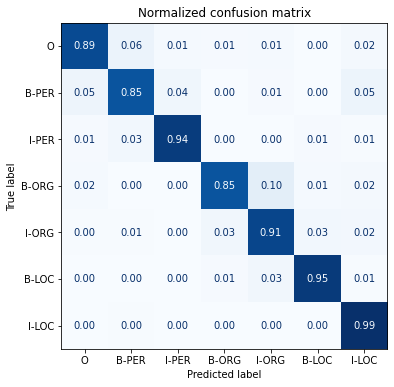

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

import matplotlib.pyplot as plt

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

plot_confusion_matrix(df_tokens["labels"], df_tokens["predicted_label"], tags.names)

모델이 B-ORG와 I-ORG를 가장 많이 혼동하는 경향을 보임

토큰 수준에서의 오류를 조사했으니 높은 손실을 내는 시퀀스를 확인. <br>
explode() 함수를 적용하기 전의 원래 DataFrame을 사용하여 토큰당 손실을 합산해 총 손실을 계산

In [54]:
def get_samples(df):
  for _, row in df.iterrows():
    labels, preds, tokens, losses = [], [], [], []
    for i, mask in enumerate(row["attention_mask"]):
      if i not in {0, len(row["attention_mask"])}:
        labels.append(row["labels"][i])
        preds.append(row["predicted_label"][i])
        tokens.append(row["input_tokens"][i])
        losses.append(f"{row['loss'][i]:.2f}")
    df_tmp = pd.DataFrame({"tokens": tokens, "labels": labels, "preds": preds, "losses": losses}).T
    yield df_tmp

df["total_loss"] = df["loss"].apply(sum)
df_tmp = df.sort_values(by="total_loss", ascending=False).head(3)

for sample in get_samples(df_tmp):
  display(sample)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
tokens,▁',▁'',▁Τ,Κ,▁'',▁',▁',▁'',▁T,▁'',▁',ri,▁'',▁',k,▁'',▁',ala,</s>
labels,O,O,O,IGN,O,O,B-LOC,I-LOC,I-LOC,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,I-LOC,I-LOC,IGN,IGN
preds,O,O,B-ORG,B-ORG,O,O,O,O,B-ORG,O,O,O,O,O,O,O,O,O,O
losses,0.00,0.00,3.44,0.00,0.00,0.00,10.46,10.07,8.27,9.45,10.15,0.00,9.87,10.14,0.00,10.09,10.17,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
tokens,▁'',8,.,▁Juli,▁'',▁:,▁Protest,camp,▁auf,▁dem,▁Gelände,▁der,▁Republika,n,ischen,▁Gar,de,</s>
labels,B-ORG,IGN,IGN,I-ORG,I-ORG,I-ORG,I-ORG,IGN,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,IGN,IGN,I-ORG,IGN,IGN
preds,O,O,O,O,O,O,O,O,O,O,O,O,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,O
losses,8.55,0.00,0.00,8.53,7.80,8.47,7.80,0.00,9.04,9.79,8.70,7.25,5.87,0.00,0.00,0.01,0.00,0.00


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
tokens,▁United,▁Nations,▁Multi,dimensional,▁Integra,ted,▁Stabil,ization,▁Mission,▁in,▁the,▁Central,▁African,▁Republic,</s>
labels,B-PER,I-PER,I-PER,IGN,I-PER,IGN,I-PER,IGN,I-PER,I-PER,I-PER,I-PER,I-PER,I-PER,IGN
preds,B-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG,I-ORG
losses,6.26,5.70,6.25,0.00,6.13,0.00,5.89,0.00,5.74,5.50,5.81,5.95,5.88,5.63,0.00


United Nations와 Central African Republic 이 모두 사람(PER)으로 레이블링 됨
<br>
PAN-X 데이터셋의 레이블이 자동으로 생성된것으로 보임. 이런 레이블을 '실버 스탠다드(silver standard)'라 함(사람이 생성한 레이블은 골드 스탠다드(gold standard)라 함)
<br>
괄호와 슬래시의 손실이 비교적 높음

# 교차 언어 전이
독일어에서 XLM-R을 미세 튜닝 했으므로 Trainer 클래스의 predict() 메서드를 사용해 다른 언어로 전이되는 능력을 평가

In [55]:
def get_f1_score(trainer, dataset):
  return trainer.predict(dataset).metrics["test_f1"]

테스트 세트의 성능을 평가

In [57]:
f1_scores = defaultdict(dict)
f1_scores["de"]["de"] = get_f1_score(trainer, panx_de_encoded["test"])
print(f"[de] 데이터셋에서 [de] 모델의 F1 점수: {f1_scores['de']['de']:.3f}")

[de] 데이터셋에서 [de] 모델의 F1 점수: 0.867


In [58]:
# 프랑스어에서 점수 확인
text_fr = "Jeff Dean est informaticien chez Google en californie"
tag_text(text_fr, tags, trainer.model, xlmr_tokenizer)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Tokens,<s>,▁Jeff,▁De,an,▁est,▁informatic,ien,▁chez,▁Google,▁en,▁cali,for,nie,</s>
Tags,I-PER,B-PER,I-PER,I-PER,O,O,O,O,B-ORG,O,B-LOC,I-LOC,I-LOC,I-PER


In [59]:
def evaluate_lang_performance(lang, trainer):
  panx_ds = encode_panx_dataset(panx_ch[lang])
  return get_f1_score(trainer, panx_ds["test"])

f1_scores["de"]["fr"] = evaluate_lang_performance("fr", trainer)
print(f"[fr] 데이터셋에서 [de]모델의 F1 점수: {f1_scores['de']['fr']:.3f}")

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/3 [00:00<?, ?ba/s]

[fr] 데이터셋에서 [de]모델의 F1 점수: 0.696


In [60]:
f1_scores["de"]["it"] = evaluate_lang_performance("it", trainer)
print(f"[fr] 데이터셋에서 [de]모델의 F1 점수: {f1_scores['de']['it']:.3f}")

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

[fr] 데이터셋에서 [de]모델의 F1 점수: 0.656


In [62]:
f1_scores["de"]["en"] = evaluate_lang_performance("en", trainer)
print(f"[en] 데이터셋에서 [de]모델의 F1 점수: {f1_scores['de']['en']:.3f}")

[en] 데이터셋에서 [de]모델의 F1 점수: 0.594


## 제로샷 전이가 유용할때
프랑스어 말뭉치로 훈련 세트의 크기를 증가시키면서 XLM-R을 미세 튜닝해 독일어 XLM-R로 교차 언어 전이한 것보다 나은 결과를 내는 훈련 세트 크기를 구한 후 실제로 레이블링된 데이터를 더 많이 수집해야 하는지 판단

In [63]:
def train_on_subset(dataset, num_samples):
  train_ds = dataset["train"].shuffle(seed=42).select(range(num_samples))
  valid_ds = dataset["validation"]
  test_ds = dataset["test"]
  training_args.logging_steps = len(train_ds) // batch_size

  trainer = Trainer(model_init=model_init, 
                    args=training_args, 
                    data_collator=data_collator,
                    compute_metrics=compute_metrics,
                    train_dataset=train_ds,
                    eval_dataset=valid_ds,
                    tokenizer=xlmr_tokenizer)
  trainer.train()
  
  f1_score = get_f1_score(trainer, test_ds)
  return pd.DataFrame.from_dict({"num_samples": [len(train_ds)], "f1_score": [f1_score]})

독일어 말뭉치 미세튜닝처럼 프랑스어 말뭉치를 입력 ID, 어텐션 마스크, 레이블 ID로 인코딩

In [64]:
panx_fr_encoded = encode_panx_dataset(panx_ch["fr"])

  0%|          | 0/5 [00:00<?, ?ba/s]

In [65]:
metrics_df = train_on_subset(panx_fr_encoded, 250)
metrics_df

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,1.797900,1.382164,0.110526
2,1.306500,1.131393,0.170438
3,1.084300,1.035612,0.185041


,num_samples,f1_score
0,250,0.167937


샘플 250개 사용시 프랑스어에서 미세 튜닝한 성능이 독일어에서 제로샷 전이로 얻은 결과보다 떨어짐
<br>

훈련 세트 크기를 늘릴 경우 확인

In [66]:
for num_samples in [500, 1000, 2000, 4000]:
  metrics_df = metrics_df.append(train_on_subset(panx_fr_encoded, num_samples), ignore_index=True)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,1.492500,1.051098,0.185071
2,0.899900,0.705176,0.569553
3,0.587300,0.584122,0.618641


Epoch,Training Loss,Validation Loss,F1
1,1.205300,0.606873,0.550045
2,0.481400,0.425944,0.702297
3,0.330100,0.390302,0.704059


Epoch,Training Loss,Validation Loss,F1
1,0.805700,0.408441,0.737765
2,0.331000,0.350425,0.780576
3,0.217100,0.333629,0.810279


Epoch,Training Loss,Validation Loss,F1
1,0.605400,0.337464,0.781681
2,0.271200,0.285458,0.813073
3,0.182100,0.287294,0.833361


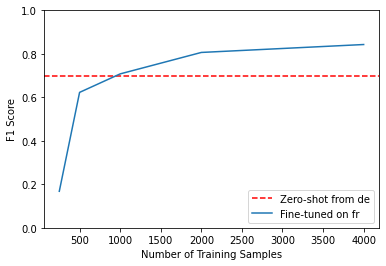

In [67]:
fig, ax = plt.subplots()
ax.axhline(f1_scores["de"]["fr"], ls="--", color="r")
metrics_df.set_index("num_samples").plot(ax=ax)
plt.legend(["Zero-shot from de", "Fine-tuned on fr"], loc="lower right")
plt.ylim((0,1))
plt.xlabel("Number of Training Samples")
plt.ylabel("F1 Score")
plt.show()

훈련 샘플이 약 750개일때까지는 제로샷이 앞섬 <br>
문서를 일일이 레이블링 하는 비용을 생각했을때 제로샷이 경제적으로 더 우위를 점하고 괜찮음

# 다국어에서 동시에 미세튜닝하기
성능 감소 폭을 줄이는 방법 하나는 다국어에서 동시에 미세튜닝을 하는것

In [68]:
from datasets import concatenate_datasets

def concatenate_splits(corpora):
  multi_corpus = DatasetDict()
  for split in corpora[0].keys():
    multi_corpus[split] = concatenate_datasets([corpus[split] for corpus in corpora]).shuffle(seed=42)
  return multi_corpus

panx_de_fr_encoded = concatenate_splits([panx_de_encoded, panx_fr_encoded])

In [69]:
training_args.logging_steps = len(panx_de_fr_encoded["train"]) // batch_size
training_args.push_to_hub = False
training_args.output_dir = "xlm-roberta-base-finetuned-panx-de-fr"

trainer = Trainer(model_init=model_init,
                  args=training_args,
                  data_collator=data_collator,
                  compute_metrics=compute_metrics,
                  tokenizer=xlmr_tokenizer,
                  train_dataset=panx_de_fr_encoded["train"],
                  eval_dataset=panx_de_fr_encoded["validation"])

trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1
1,0.290500,0.178259,0.830973
2,0.146100,0.159958,0.845506
3,0.094800,0.165646,0.858905


TrainOutput(global_step=2145, training_loss=0.17714588014118043, metrics={'train_runtime': 694.0678, 'train_samples_per_second': 74.171, 'train_steps_per_second': 3.09, 'total_flos': 1140291491923584.0, 'train_loss': 0.17714588014118043, 'epoch': 3.0})

각 언어의 테스트 세트에서 모델의 성능 확인

In [70]:
for lang in langs:
  f1 = evaluate_lang_performance(lang, trainer)
  print(f"[{lang}] 데이터셋에서 [de-fr] 모델의 f1 점수: {f1:.3f}")

  0%|          | 0/13 [00:00<?, ?ba/s]

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/7 [00:00<?, ?ba/s]

[de] 데이터셋에서 [de-fr] 모델의 f1 점수: 0.869


[fr] 데이터셋에서 [de-fr] 모델의 f1 점수: 0.866


[it] 데이터셋에서 [de-fr] 모델의 f1 점수: 0.795


[en] 데이터셋에서 [de-fr] 모델의 f1 점수: 0.702


- 다중 언어 학습은 성능상 큰 이득을 제공, 특히 유사한 언어군에서 데이터가 부족한 언어로 교차 언어 전이를 수행할 때 큰 이득을 얻게 됨
- 일반적 전략으로 한국어처럼 다른 종류의 텍스트를 다룰 때는 한 어족(language family) 내에서 교차 언어 전이에 초점을 맞추는 것이 좋음